# Fashion Classification (using pytorch)

# Information
- blog : https://yscho03.tistory.com/46

## Setup

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import numpy as np
from torch.utils.data import DataLoader

import os
import time

In [2]:
batch_size = 100
num_epochs = 50
learning_rate = 0.0001

In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') 
device

device(type='cuda')

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

In [5]:
BASE_DIR = os.getcwd()
DATASET_PATH = os.path.join(BASE_DIR, 'datasets')

In [6]:
train_data = datasets.FashionMNIST(root=DATASET_PATH, train=True, transform=transform, download=True)
test_data = datasets.FashionMNIST(root=DATASET_PATH, train=False, transform=transform, download=True)

D:\anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, drop_last=True)

In [8]:
dataloader = iter(train_loader)
rst = dataloader.next()
img, label = rst
print(type(img))
print(type(label))
print(img.shape)
print(label.shape)
print(img.dtype)
print(label.dtype)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.float32
torch.int64


In [9]:
label_names = {
    0: 'T-Shirt', 
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt',
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle Boot'
}

## Visualize the data

In [10]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [11]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images[0].shape)
print(labels[0])

torch.Size([1, 28, 28])
tensor(4)


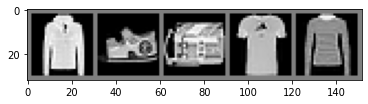

T-Shirt Trouser Pullover Dress  Coat


In [12]:
imshow(make_grid(images[0:5]))
print(' '.join('%5s' % label_names[j] for j in range(5)))

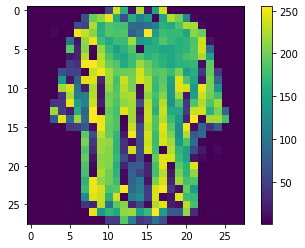

In [13]:
tf = transforms.ToPILImage()
pil_img = tf(images[0])

plt.figure()
plt.imshow(pil_img)
plt.colorbar()
plt.gca().grid(False)

## Build Model

In [14]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.layer1 = nn.Sequential(
            torch.nn.Linear(784, 256, bias=True),
            torch.nn.BatchNorm1d(256),
            torch.nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            torch.nn.Linear(256, 64, bias=True),
            torch.nn.BatchNorm1d(64),
            torch.nn.ReLU()
        )
        self.layer3 = nn.Sequential(
            torch.nn.Linear(64, 10, bias=True)
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1) # flatten
        x_out = self.layer1(x)
        x_out = self.layer2(x_out)
        x_out = self.layer3(x_out)
        return x_out

In [15]:
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight) 

In [16]:
model = DNN().to(device)
model.apply(weights_init)

DNN(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=64, out_features=10, bias=True)
  )
)

## Training

In [17]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
costs = []
total_batch = len(train_loader)
for epoch in range(num_epochs):
    epoch_loss = 0
    start = time.time()
    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss
        
    avg_cost = epoch_loss / total_batch
    print(f'epoch : {epoch+1}, Loss : {epoch_loss}, time : {time.time() - start}')
    costs.append(avg_cost)              

epoch : 1, Loss : 427.8835754394531, time : 10.723026752471924
epoch : 2, Loss : 264.4226989746094, time : 10.470693826675415
epoch : 3, Loss : 227.8849639892578, time : 10.600678205490112
epoch : 4, Loss : 206.06298828125, time : 10.684939622879028
epoch : 5, Loss : 190.15463256835938, time : 10.633031845092773
epoch : 6, Loss : 176.64663696289062, time : 10.609180927276611
epoch : 7, Loss : 166.87904357910156, time : 10.762888193130493
epoch : 8, Loss : 158.03636169433594, time : 10.721224308013916
epoch : 9, Loss : 148.6572723388672, time : 10.67033076286316
epoch : 10, Loss : 140.81983947753906, time : 10.924778938293457
epoch : 11, Loss : 134.04307556152344, time : 10.993546724319458
epoch : 12, Loss : 127.07262420654297, time : 10.883878707885742
epoch : 13, Loss : 122.33357238769531, time : 10.841186046600342
epoch : 14, Loss : 115.78421783447266, time : 10.912569522857666
epoch : 15, Loss : 111.69361114501953, time : 10.85362958908081
epoch : 16, Loss : 105.64018249511719, time

## Inference

In [19]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, argmax = torch.max(outputs, 1)
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()
    
    print('Accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))     

Accuracy for 10000 images: 88.63%


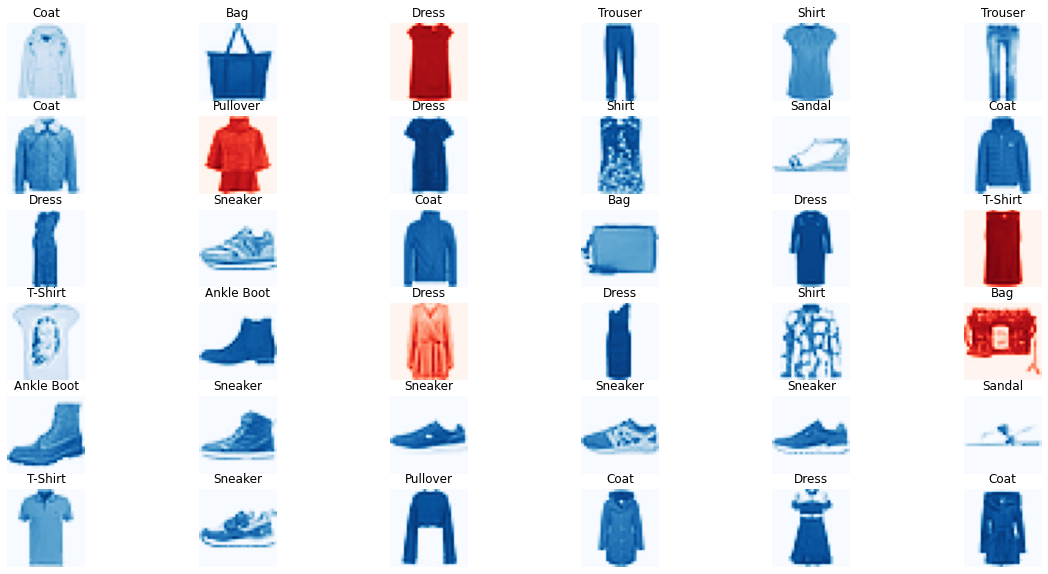

In [20]:
columns = 6
rows = 6
fig = plt.figure(figsize=(20,10))
 
model.eval()
for i in range(1, columns*rows+1):
    idx = np.random.randint(len(test_data))
    img = test_data[idx][0].unsqueeze(dim=0).to(device) 
 
    output = model(img)
    _, argmax = torch.max(output, 1)
    pred = label_names[argmax.item()]
    label = label_names[test_data[idx][1]]
    
    fig.add_subplot(rows, columns, i)
    plt.title(label)
    if pred == label:        
        cmap = 'Blues'
    else:
        cmap = 'Reds'
    plot_img = test_data[idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')
    
plt.show() 

In [21]:
torch.save(model.state_dict(), os.path.join(BASE_DIR, f'model_{num_epochs}.pt'))